In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

### Loading and preparing the data

In [2]:
# naming columns and importing dataset

new_cols = ["symbol","normalized_losses","make", "fuel_type","aspiration",
           "number_doors", "body_style","drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height","curb-weight", "engine_type",
           "cylinders_num", "engine_size","fuel_system","bore", "stroke","compression_ration",
           "horsepower", "peak_rpm", "city_mpg","highway_mpg","price"]
# the dataset
cars = pd.read_csv("imports-85.data", names = new_cols)


In [3]:
cars.head()

,symbol,normalized_losses,make,fuel_type,aspiration,number_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ration,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.dtypes

symbol                  int64
normalized_losses      object
make                   object
fuel_type              object
aspiration             object
number_doors           object
body_style             object
drive_wheels           object
engine_location        object
wheel_base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine_type            object
cylinders_num          object
engine_size             int64
fuel_system            object
bore                   object
stroke                 object
compression_ration    float64
horsepower             object
peak_rpm               object
city_mpg                int64
highway_mpg             int64
price                  object
dtype: object

In [5]:
# replacing rows with "?" with NaN
cars.replace("?", np.nan, inplace= True)

In [6]:
# converting to numeric
cars[["normalized_losses","stroke","horsepower","peak_rpm","bore", "price"]] = cars[["normalized_losses","stroke","horsepower","peak_rpm","bore","price"]].astype(float)


In [7]:
# 
cars["normalized_losses"].isnull().sum()

41

In [8]:
# proportion of Nan values in normalized_losses column
print("proportion of Nan Values in normalized losses column: ",(cars["normalized_losses"].isnull().sum() / cars.shape[0])*100 )


proportion of Nan Values in normalized losses column:  20.0


In [9]:
# since the % of nan values is over 10, I will replace the NaN values with the column's average
cars["normalized_losses"].fillna(cars["normalized_losses"].mean(), inplace=True)

In [10]:
# other columns' missing values
cars.isna().sum()
cars.dropna(axis = 0, how = "any", inplace = True)

In [11]:
# will only keep columns with numeric values
cars = cars.select_dtypes(exclude=['object'])
new_columns = cars.columns

In [12]:
# normalizing columns except price


x = cars.loc[:, cars.columns != 'price'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cars_clean = pd.DataFrame(x_scaled)
cars_clean["price"] = cars["price"].values

new_columns = cars.columns 
cars_clean.columns = new_columns

cars_clean.head()

,symbol,normalized_losses,wheel_base,length,width,height,curb-weight,engine_size,bore,stroke,compression_ration,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Finding the right model

Worflow:
- select relevant features to use for predicting the target column
- use grid search to find the optimal hyperparameter value for the selected features
- evaluate the model's accuracy and repeat the process

#### Univariate K-nearest neighbours model

In [13]:

def knn_train_test(train_col, target_col, df):

    target = df[[target_col]]
    features = df[[train_col]]
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state=29)
    model = KNeighborsRegressor(n_neighbors= 5, algorithm='brute')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    
    #calculate RMSE
    mse=mean_squared_error(target_test,predictions)
    rmse=np.sqrt(mse)
    
    return rmse

In [14]:
knn_train_test("wheel_base", "price", cars_clean)

6956.101211572544

#### Visualising each individual column's rmse value

In [15]:
training_cols = list(cars_clean.columns)
training_cols.remove("price")

In [16]:
rmse_values = {}


for col in training_cols:
    rmse_val = knn_train_test(col, "price", cars_clean)
    rmse_values[col] = rmse_val 

# sorting out results    
sorted(rmse_values.items(), key = lambda x:x[1])

[('curb-weight', 2615.074668738337),
 ('highway_mpg', 3032.8414551881365),
 ('engine_size', 3266.8335577985868),
 ('width', 3456.4335138835577),
 ('city_mpg', 3879.9497831801896),
 ('length', 4952.800891803157),
 ('horsepower', 5453.337513006987),
 ('wheel_base', 6956.101211572544),
 ('bore', 7304.802448828459),
 ('normalized_losses', 7392.941533097288),
 ('symbol', 7750.170987294905),
 ('stroke', 7777.809884075371),
 ('height', 8109.252539458735),
 ('compression_ration', 8233.174907185423),
 ('peak_rpm', 8713.638413488687)]

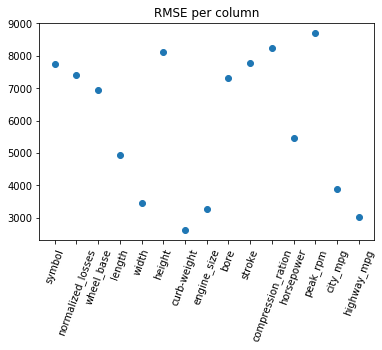

In [17]:
# visualizing the differences
plt.scatter(rmse_values.keys(), rmse_values.values())
plt.xticks(rotation = 70)
plt.title("RMSE per column")
plt.show()

#### Multivariate K-nearest neighbours model

Select relevant features with the lowest RMSE and see results

In [40]:
two_features = ["curb-weight","highway_mpg"]
three_features = ["curb-weight","highway_mpg","engine_size"]
four_features = ["curb-weight","highway_mpg","engine_size","width"]
five_features = ["curb-weight","highway_mpg","engine_size","width", "city_mpg"]

In [19]:
def knn_train_test(train_cols, target_col, df, k_numbers):

    target = df[target_col]
    features = df[train_cols]
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state=29)
    model = KNeighborsRegressor(n_neighbors=k_numbers, algorithm='brute')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    
    #calculate RMSE
    mse=mean_squared_error(target_test,predictions)
    rmse=np.sqrt(mse)
    
    return rmse


In [41]:
# trying with different features
knn_train_test(two_features, "price", cars_clean, 5)

3370.575479890789

In [42]:
knn_train_test(three_features, "price", cars_clean, 5)

2623.9033595008796

In [43]:
# trying with different features
knn_train_test(four_features, "price", cars_clean, 5)

2209.187872592609

In [44]:
knn_train_test(five_features, "price", cars_clean, 5)

2299.1231996523125

#### Hyperparameter Tuning

After selecting the best combination of features (four_features), proceed with hyperparameter tuning

In [23]:
hyper_params = [x for x in range(1,21)]
rmse_values = {}

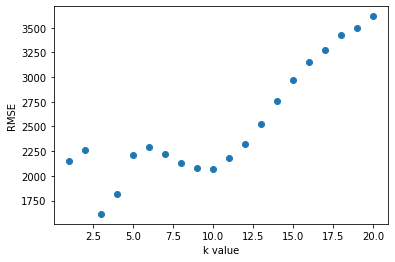

In [45]:
features = cars_clean[four_features].values
target = cars_clean["price"].values

for hp in hyper_params:
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state=29)
    model = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    mse=mean_squared_error(target_test,predictions)
    rmse=np.sqrt(mse)
    rmse_values[hp] = rmse

plt.scatter(rmse_values.keys(), rmse_values.values())
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

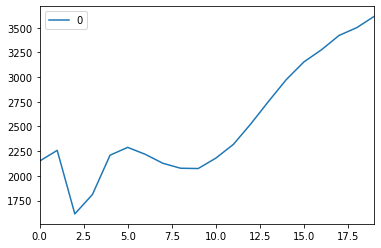

In [46]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_values.values()) #elbow curve 
curve.plot()

The optimal number of hyperparameters is 4.


In [27]:
#TO DO
#check the cross validation


#### Experimenting with Cross Validation 

In [49]:
from sklearn.model_selection import KFold, cross_val_score

In [60]:
kf = KFold(10, shuffle=True, random_state=1) # 10 average k


In [56]:
mses = cross_val_score(model, cars_clean[four_features], cars_clean["price"], scoring = "neg_mean_squared_error", cv = kf)

rmses = np.sqrt(np.absolute(mses))

avg_rmse = np.mean(rmses)

print("Average RMSE is", avg_rmse)

Average RMSE is 2690.8475119451364


In [57]:
mses = cross_val_score(model, cars_clean[three_features], cars_clean["price"], scoring = "neg_mean_squared_error", cv = kf)

rmses = np.sqrt(np.absolute(mses))

avg_rmse = np.mean(rmses)

print("Average RMSE is", avg_rmse)

Average RMSE is 3099.1949755632063


In [58]:
mses = cross_val_score(model, cars_clean[five_features], cars_clean["price"], scoring = "neg_mean_squared_error", cv = kf)

rmses = np.sqrt(np.absolute(mses))

avg_rmse = np.mean(rmses)

print("Average RMSE is", avg_rmse)

Average RMSE is 2907.7786820875376
